<img src="img/BTS1.png"/>

<div class="alert alert-block alert-success">
<b>Case Study - Bitcoin Trading strategy through ML: </b> In this CS, we aim to solve the problem of predicting a buy or sell signal for a trading strategy through classification framework (a supervised machine learning framework). It can be viewed as binary (1/0) classification exercise.
The buy or sell signal are decided on the basis on the comparison of short term vs. long term price.
For the purpose of presented case study, we get the data from one of the largest Bit‐ coin exchanges in terms of average daily volume traded—Bitstamp (https:// www.bitstamp.com). Data can be found at: https://www.kaggle.com/mczielinski/bitcoin-historical-data
</div>

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Download/import the relevant packages</span></b>
</div>

In [1]:
#  Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

In [2]:
# Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Check the version of the packages used
import keras
import tensorflow
import torch
import pycaret
import sklearn
import pandas
import numpy
print("keras version: ", keras.__version__)
print("Tensorflow version: ", tensorflow.__version__)
print("torch version: ", torch.__version__)
print("pycaret version: ", pycaret.__version__)
print("sklearn version: ", sklearn.__version__)
print("pandas version: ", pandas.__version__)
print("numpy version: ", numpy.__version__)

keras version:  2.4.3
Tensorflow version:  2.3.1
torch version:  1.7.0
pycaret version:  2.0.0
sklearn version:  0.23.2
pandas version:  1.2.2
numpy version:  1.18.5


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Load the Dataset</span></b>
</div>

In [16]:
# load dataset
df_bc = pd.read_csv('/Users/shovonsengupta/Desktop/All/EC-Council Course/AI for Finance - Videos/Section 7 Financial Analytics with Volatility Index/data/bitstampData_full_2.csv',parse)

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Basic Exploratory Data Analysis</span></b>
</div>

In [17]:
df_bc.shape

(4727777, 8)

In [18]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727777 entries, 0 to 4727776
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 288.6 MB


In [19]:
# peek at data
set_option('display.width', 100)
df_bc.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
4727776,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


In [24]:
# describe data
set_option('precision', 3)
df_bc.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.728e+06,3.484e+06,3.484e+06,3.484e+06,3.484e+06,3.484e+06,3.484e+06,3.484e+06
mean,1.467e+09,4.571e+03,4.574e+03,4.567e+03,4.571e+03,9.423e+00,3.316e+04,4.571e+03
std,8.204e+07,4.775e+03,4.779e+03,4.771e+03,4.775e+03,3.101e+01,1.129e+05,4.775e+03
min,1.325e+09,3.800e+00,3.800e+00,1.500e+00,1.500e+00,0.000e+00,0.000e+00,3.800e+00
25%,1.396e+09,4.322e+02,4.324e+02,4.320e+02,4.322e+02,3.918e-01,4.148e+02,4.322e+02
50%,1.468e+09,3.085e+03,3.093e+03,3.078e+03,3.084e+03,1.937e+00,3.305e+03,3.085e+03
75%,1.538e+09,8.158e+03,8.163e+03,8.153e+03,8.157e+03,7.300e+00,2.158e+04,8.158e+03
max,1.609e+09,2.900e+04,2.901e+04,2.896e+04,2.900e+04,5.854e+03,1.045e+07,2.899e+04


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Basic Data Preparation</span></b>
</div>

In [25]:
#Checking for any null values and removing the null values'''
print('Null Values =',df_bc.isnull().values.any())

Null Values = True


Given that there are null values, we need to clean the data by filling the NaNs with the last available values.

In [26]:
df_bc[df_bc.columns.values] = df_bc[df_bc.columns.values].ffill()

In [27]:
df_bc=df_bc.drop(columns=['Timestamp'])

In [28]:
df_bc.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,4.39,4.39,4.39,4.39,0.456,2.0,4.39,1970-01-01 00:00:01.325317920
1,4.39,4.39,4.39,4.39,0.456,2.0,4.39,1970-01-01 00:00:01.325317980
2,4.39,4.39,4.39,4.39,0.456,2.0,4.39,1970-01-01 00:00:01.325318040
3,4.39,4.39,4.39,4.39,0.456,2.0,4.39,1970-01-01 00:00:01.325318100
4,4.39,4.39,4.39,4.39,0.456,2.0,4.39,1970-01-01 00:00:01.325318160


In [29]:
df_bc=df_bc.drop(columns=['date'])

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Create the Dependent Binary flag variable</span></b>
</div>

- 1 if the signal is that short term price will go up as compared to the long term.

- 0 if the signal is that short term price will go down as compared to the long term.


In [30]:
# Create short simple moving average over the short window
df_bc['short_mavg'] = df_bc['Close'].rolling(window=10, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
df_bc['long_mavg'] = df_bc['Close'].rolling(window=60, min_periods=1, center=False).mean()

# Create signals
df_bc['signal'] = np.where(df_bc['short_mavg'] > df_bc['long_mavg'], 1.0, 0.0)

In [31]:
df_bc.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,short_mavg,long_mavg,signal
0,4.39,4.39,4.39,4.39,0.456,2.0,4.39,4.39,4.39,0.0
1,4.39,4.39,4.39,4.39,0.456,2.0,4.39,4.39,4.39,0.0
2,4.39,4.39,4.39,4.39,0.456,2.0,4.39,4.39,4.39,0.0
3,4.39,4.39,4.39,4.39,0.456,2.0,4.39,4.39,4.39,0.0
4,4.39,4.39,4.39,4.39,0.456,2.0,4.39,4.39,4.39,0.0


In [32]:
df_bc.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,short_mavg,long_mavg,signal
4727772,28801.47,28829.42,28785.64,28829.42,0.965,27804.572,28806.430,28828.454,28802.248,1.0
4727773,28829.42,28863.90,28829.42,28857.06,2.369,68332.351,28846.442,28826.121,28804.307,1.0
4727774,28850.49,28900.52,28850.49,28882.82,2.467,71232.784,28879.056,28829.955,28806.338,1.0
4727775,28910.54,28911.52,28867.60,28881.30,7.333,211870.913,28893.696,28837.161,28809.287,1.0
4727776,28893.21,28928.49,28893.21,28928.49,5.758,166449.709,28909.166,28846.313,28812.626,1.0


__Check for the distribution of the binary variable__

In [33]:
df_bc['signal'].value_counts()/len(df_bc)

1.0    0.506
0.0    0.494
Name: signal, dtype: float64

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Feature Engineering</span></b>
</div>

We begin by the constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the bicoin consists of date, open, high, low, close and Volume. Using this data we calculate the following technical indicators:

- __Moving Average__ : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart.

- __Stochastic Oscillator %K and %D__ : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.

- __Relative Strength Index(RSI)__ :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.

- __Rate Of Change(ROC)__: It is a momentum oscillator, which measures the percentage change between the current price and the n period past price.

- __Momentum (MOM)__ : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.

In [34]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

df_bc['EMA10'] = EMA(df_bc, 10)
df_bc['EMA30'] = EMA(df_bc, 30)
df_bc['EMA200'] = EMA(df_bc, 200)
df_bc.head()

#calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC

df_bc['ROC10'] = ROC(df_bc['Close'], 10)
df_bc['ROC30'] = ROC(df_bc['Close'], 30)

#Calculation of price momentum
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM

df_bc['MOM10'] = MOM(df_bc['Close'], 10)
df_bc['MOM30'] = MOM(df_bc['Close'], 30)

#calculation of relative strength index
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

df_bc['RSI10'] = RSI(df_bc['Close'], 10)
df_bc['RSI30'] = RSI(df_bc['Close'], 30)
df_bc['RSI200'] = RSI(df_bc['Close'], 200)

#calculation of stochastic osillator.

def STOK(close, low, high, n): 
    STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    STOD = STOK.rolling(3).mean()
    return STOD

df_bc['%K10'] = STOK(df_bc['Close'], df_bc['Low'], df_bc['High'], 10)
df_bc['%D10'] = STOD(df_bc['Close'], df_bc['Low'], df_bc['High'], 10)
df_bc['%K30'] = STOK(df_bc['Close'], df_bc['Low'], df_bc['High'], 30)
df_bc['%D30'] = STOD(df_bc['Close'], df_bc['Low'], df_bc['High'], 30)
df_bc['%K200'] = STOK(df_bc['Close'], df_bc['Low'],df_bc['High'], 200)
df_bc['%D200'] = STOD(df_bc['Close'], df_bc['Low'],df_bc['High'], 200)

In [35]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA

df_bc['MA21'] = MA(df_bc, 10)
df_bc['MA63'] = MA(df_bc, 30)
df_bc['MA252'] = MA(df_bc, 200)
df_bc.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,short_mavg,long_mavg,signal,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
4727772,28801.47,28829.42,28785.64,28829.42,0.965,27804.572,28806.430,28828.454,28802.248,1.0,...,51.660,38.336,26.611,28.938,19.731,63.843,62.683,28828.454,28853.109,28829.481
4727773,28829.42,28863.90,28829.42,28857.06,2.369,68332.351,28846.442,28826.121,28804.307,1.0,...,51.925,77.639,42.024,47.207,27.836,69.368,64.396,28826.121,28854.381,28829.373
4727774,28850.49,28900.52,28850.49,28882.82,2.467,71232.784,28879.056,28829.955,28806.338,1.0,...,52.170,84.593,66.856,64.234,46.793,74.516,69.242,28829.955,28855.593,28829.258
4727775,28910.54,28911.52,28867.60,28881.30,7.333,211870.913,28893.696,28837.161,28809.287,1.0,...,52.154,75.993,79.408,63.230,58.224,74.213,72.699,28837.161,28857.404,28829.366
4727776,28893.21,28928.49,28893.21,28928.49,5.758,166449.709,28909.166,28846.313,28812.626,1.0,...,52.602,100.000,86.862,94.421,73.962,83.644,77.458,28846.313,28859.730,28829.533


In [36]:
df_bc.shape

(4727777, 29)

In [37]:
#excluding columns that are not needed for our prediction.
df_bc=df_bc.drop(['High','Low','Open', 'Volume_(Currency)','short_mavg','long_mavg'], axis=1)

In [38]:
df_bc = df_bc.dropna(axis=0)

In [39]:
df_bc.shape

(4227990, 23)

In [40]:
df_bc.head()

,Close,Volume_(BTC),Weighted_Price,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
549,4.58,9.0,4.58,1.0,4.475,4.424,4.396,4.328,4.328,0.19,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,4.446,4.409,4.393
550,4.58,9.0,4.58,1.0,4.494,4.434,4.397,4.328,4.328,0.19,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,4.465,4.415,4.394
551,4.58,9.0,4.58,1.0,4.510,4.443,4.399,4.328,4.328,0.19,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,4.484,4.421,4.395
552,4.58,9.0,4.58,1.0,4.522,4.452,4.401,4.328,4.328,0.19,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,4.503,4.428,4.396
553,4.58,9.0,4.58,1.0,4.533,4.460,4.403,4.328,4.328,0.19,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,4.522,4.434,4.397


In [42]:
df_bc.isnull().sum()/len(df_bc)

Close             0.0
Volume_(BTC)      0.0
Weighted_Price    0.0
signal            0.0
EMA10             0.0
EMA30             0.0
EMA200            0.0
ROC10             0.0
ROC30             0.0
MOM10             0.0
MOM30             0.0
RSI10             0.0
RSI30             0.0
RSI200            0.0
%K10              0.0
%D10              0.0
%K30              0.0
%D30              0.0
%K200             0.0
%D200             0.0
MA21              0.0
MA63              0.0
MA252             0.0
dtype: float64

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">A quick glance of the data</span></b>
</div>

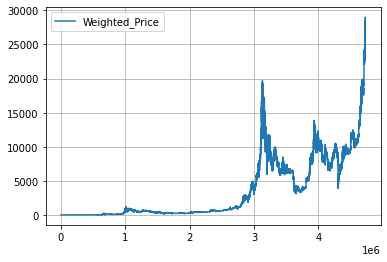

In [43]:
df_bc[['Weighted_Price']].plot(grid=True)
plt.show()

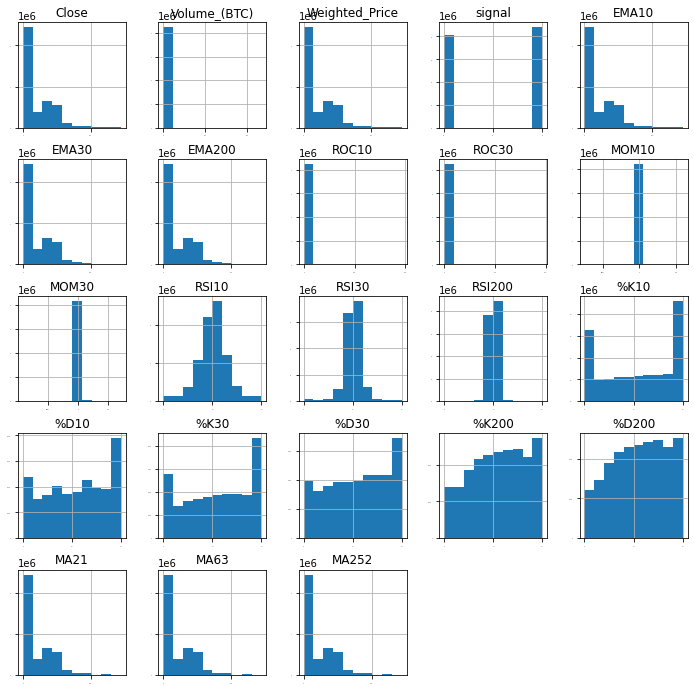

In [44]:
# histograms
df_bc.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

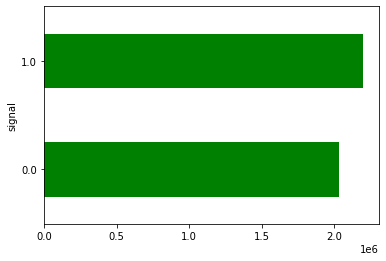

In [45]:
fig = plt.figure()
plot = df_bc.groupby(['signal']).size().plot(kind='barh', color='green')
plt.show()

__Observation:__ The event rate is approximately 53% - number of the buy signals were more than the number of sell signals.

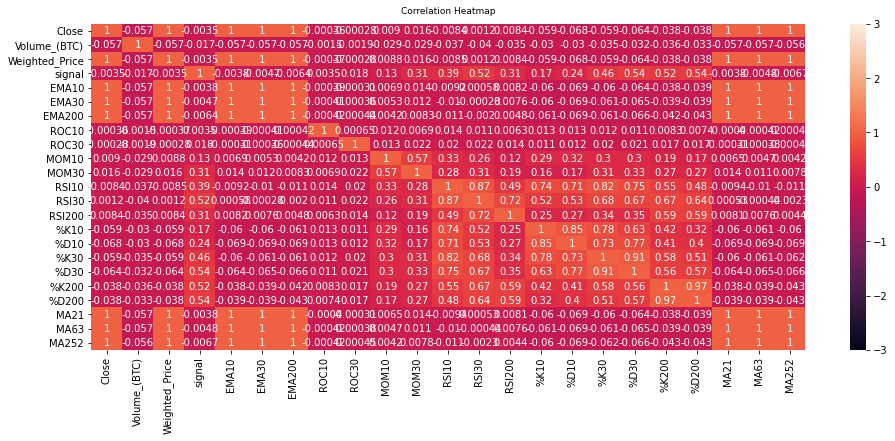

In [54]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_bc.corr(), vmin=-3, vmax=3, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':9}, pad=10);

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Model Development</span></b>
</div>

__Train Test Split__

In [57]:
# split out validation dataset for the end
subset_dataset= df_bc.iloc[-100000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, df_bc.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [62]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(80000, 22)
(20000, 22)
(80000,)
(20000,)


__Test Options and Evaluation Metrics__

In [58]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring = 'precision'
#scoring = 'recall'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

__Compare Models and Algorithms__

In [59]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

__K-folds cross validation__

In [60]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.889400 (0.011954)
LDA: 0.913475 (0.003500)
KNN: 0.922863 (0.004212)
CART: 0.895463 (0.003633)
NB: 0.795513 (0.005838)
NN: 0.820563 (0.065415)
AB: 0.912037 (0.002697)
GBM: 0.920975 (0.004532)
RF: 0.928250 (0.002913)


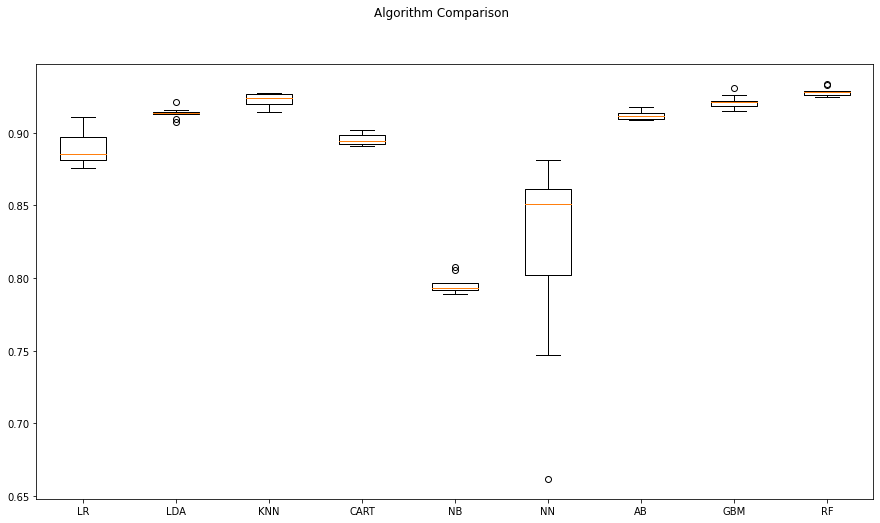

In [61]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

__Hyper-parameter Tuning__

In [63]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']

for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.913587 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#6 0.883050 (0.004460) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#5 0.883575 (0.004905) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#2 0.912100 (0.004866) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#1 0.913587 (0.004703) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.880263 (0.005421) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#7 0.880450 (0.006118) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#4 0.912050 (0.005231) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#3 0.912087 (0.004371) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


__Results on the Test Dataset__

In [64]:
# prepare model
model = RandomForestClassifier(criterion='gini', n_estimators=80,max_depth=10,n_jobs=-1) 
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=80, n_jobs=-1)

In [65]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.91285
[[8357  836]
 [ 907 9900]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91      9193
         1.0       0.92      0.92      0.92     10807

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

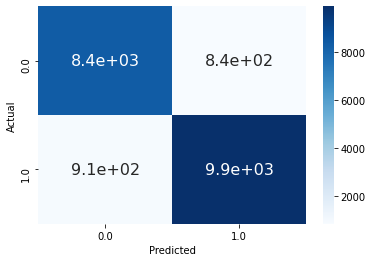

In [66]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

__Feature Importance__

Text(0.5, 0, 'Variable Importance')

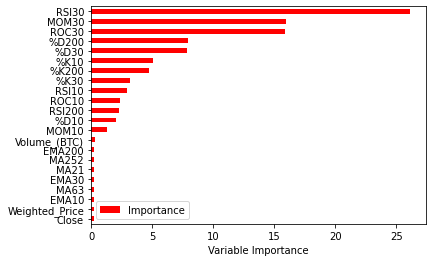

In [67]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r' )
plt.xlabel('Variable Importance')

__Backtesting Results__

<AxesSubplot:>

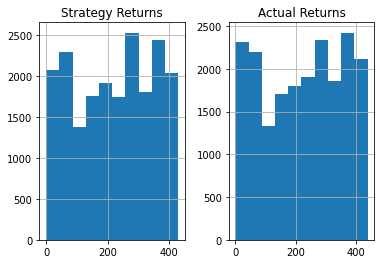

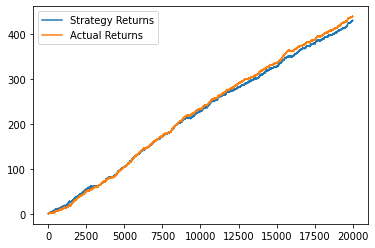

In [68]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)
#backtestdata = pd.DataFrame()
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()

__BONUS!__

In [69]:
import xgboost
print(xgboost.__version__)

1.3.3


In [73]:
# Build the XGBosst model
# Hyper-parameter Tuning for XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import plot_importance
xgb1 = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'eval_metric': 'logloss'
              'learning_rate': [.03, 0.05, .07,0.30,0.40], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200,300,500,700,1000]}

xgb_rand = RandomizedSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

xgb_rand.fit(X_train,Y_train)
print(xgb_rand.best_score_)
print(xgb_rand.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  5.0min finished


[20:29:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9387875
{'subsample': 0.7, 'objective': 'binary:logistic', 'nthread': 4, 'n_estimators': 1000, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [77]:
# Training the Model by Applying Decision Tree Classifier
clf_xgb_best = XGBClassifier(n_estimators=1000,objective='reg:logistic',
                             eval_metric='logloss',
                             min_child_weight=4,max_depth=7,
                             learning_rate=0.05,colsample_bytree=0.7,
                             random_state=10)
clf_xgb_best.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=7, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='reg:logistic', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
# Declaring a Function to Detect Model’s Accuracy 
from sklearn import metrics
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Model name: XGBoost classifier
Test accuracy (Accuracy Score): 0.942950
Test accuracy (ROC AUC Score): 0.942613
Area Under the Precision-Recall Curve: 0.421213


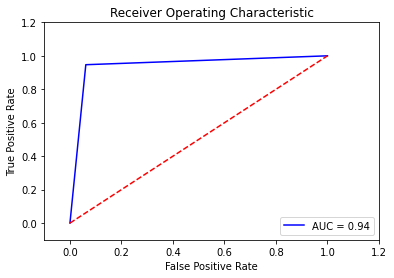

In [81]:
# Finding Accuracy of Decision Tree Classifier
Y_pred = clf_xgb_best.predict(X_validation)
model_perf('XGBoost classifier', X_train, Y_train, Y_validation,Y_pred)

__Model Performance measures__

In [88]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)

In [89]:
model_performance_metrics(true_labels=Y_validation, predicted_labels=Y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      9193
         1.0       0.95      0.95      0.95     10807

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [91]:
# Get the confusion Metrics
sklearn.metrics.confusion_matrix(Y_validation, Y_pred)

array([[ 8627,   566],
       [  575, 10232]])

__Generating Decile Report__

In [92]:
def Decile_report(model, X_train, X_test, Y_train,Y_test):
    y_train = model.predict_proba(X_train)
    tab = np.array((y_train[:,1], Y_train)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    l1 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l1.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    train_decile = pd.DataFrame(l1,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    y_test = model.predict_proba(X_test)
    tab = np.array((y_test[:,1], Y_test)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    
    l2 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l2.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    test_decile = pd.DataFrame(l2,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    return train_decile,test_decile

In [93]:
train_decile, test_decile = Decile_report(clf_xgb_best, X_train, X_validation, Y_train, Y_validation)

In [94]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,2000,1.000,1.000,2000.0,2000.0,1.000,0.185,1.851
1,1,2000,1.000,1.000,2000.0,4000.0,1.000,0.370,1.851
2,2,2000,0.999,1.000,2000.0,6000.0,1.000,0.555,1.851
3,3,2000,0.988,0.988,1976.0,7976.0,0.997,0.738,1.845
4,4,2000,0.878,0.878,1755.0,9731.0,0.973,0.900,1.801
5,5,2000,0.441,0.464,929.0,10660.0,0.888,0.986,1.644
6,6,2000,0.070,0.070,139.0,10799.0,0.771,0.999,1.428
7,7,2000,0.006,0.004,8.0,10807.0,0.675,1.000,1.250
8,8,2000,0.000,0.000,0.0,10807.0,0.600,1.000,1.111
9,9,2000,0.000,0.000,0.0,10807.0,0.540,1.000,1.000


__Feature Importance: XGBoost Model using ELI5 [Permutation Importance]__

In [95]:
import eli5
print(eli5.__version__)

0.10.1


Text(0.5, 1.0, 'Feature Importances')

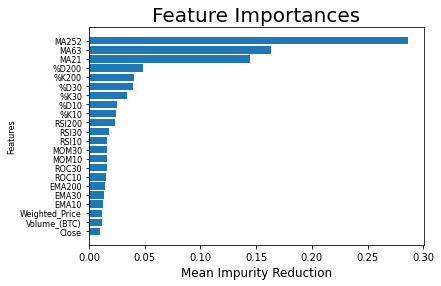

In [97]:
tree_feature =  pd.Series(clf_xgb_best.feature_importances_, X_train.columns).sort_values(ascending = True)
plt.barh(X_train.columns, tree_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Feature Importances', fontsize = 20)

In [98]:
#Importing the module
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
#Permutation Importance
perm = PermutationImportance(clf_xgb_best, scoring = 'accuracy' ,random_state=101).fit(X_validation, Y_validation)
show_weights(perm, feature_names = list(X_validation.columns))

Weight,Feature
0.4744 ± 0.0056,RSI30
0.0974 ± 0.0032,RSI10
0.0440 ± 0.0010,%D200
0.0434 ± 0.0025,%K200
0.0429 ± 0.0025,%K10
0.0230 ± 0.0010,%D30
0.0130 ± 0.0013,ROC10
0.0124 ± 0.0008,MA252
0.0104 ± 0.0015,MA21
0.0100 ± 0.0014,RSI200


__Congratulations!__